# Comparative Analysis
In this notebook, we compare ClaSS with different competitors regarding scalability.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm
from scipy import stats

In [3]:
from src.visualizer import plot_clasp, plot_clasp_with_ts
from src.utils import load_dataset
from src.clazz.window_size import suss

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

In [5]:
dataset = "TSSB"
df_comb = load_dataset(dataset)
df_comb['window_size'] = df_comb.time_series.apply(lambda ts: np.int64(suss(ts[:10_000])))
df_comb['ts_len'] = df_comb.time_series.apply(len)
relevant_names = df_comb[df_comb.change_points.apply(len) == 1].name

Let's load the scores from the different methods.

In [6]:
methods = list()

candidate_names = ["ClaSS", "FLOSS", "BOCD", "Window"]

for candidate_name in candidate_names:
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/competitor_{dataset}/{file_name}")
   
df_runtimes = pd.DataFrame()
df_throughput = pd.DataFrame()
df_scores = pd.DataFrame()

for name, df in methods:
    runtimes = df["runtimes"].apply(eval)
    
    df_runtimes["name"] = df.dataset
    df_runtimes[name] = runtimes.apply(np.sum)
    
    df_throughput["name"] = df.dataset
    df_throughput[name] = (df_comb.ts_len / runtimes.apply(np.sum))
    
    df_scores["name"] = df.dataset
    df_scores[name] = df[eval_score]
    
idx_sizes = np.argsort(df_comb['time_series'].apply(len)).to_numpy()


# df_runtimes = df_runtimes[df_scores.name.isin(relevant_names)]
# df_scores = df_scores[df_scores.name.isin(relevant_names)]
df_throughput

,name,ClaSS,FLOSS,BOCD,Window
0,Adiac,352.335600,50.770061,747.965407,1017.105871
1,ArrowHead,359.899630,51.079972,917.783425,1335.141892
2,Beef,364.780330,51.054271,752.565930,1750.661154
3,BeetleFly,444.805849,89.825633,565.409734,1084.750359
4,BirdChicken,417.501806,88.328859,545.086767,1262.489274
5,Car,429.516927,73.272904,729.331396,1234.215677
6,CBF,281.633120,34.175352,748.106356,1551.991723
7,ChlorineConcentration,444.917188,248.741386,397.574090,1220.636120
8,CinCECGTorso,426.190662,239.159349,406.308465,1344.500937
9,Coffee,864.199665,33.552802,846.073795,1330.406439


Let's calculate the sum/mean/std score.

In [7]:
df_runtimes.iloc[:,1:].sum(axis=0) / 60 / 60

ClaSS     0.218049
FLOSS     0.535622
BOCD      0.258206
Window    0.079912
dtype: float64

In [8]:
df_throughput.mean(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2549/2575769137.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_throughput.mean(axis=0)


ClaSS      479.940522
FLOSS      404.746340
BOCD       543.206783
Window    1246.566227
dtype: float64

In [9]:
df_throughput.std(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2549/676843339.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_throughput.std(axis=0)


ClaSS     165.086100
FLOSS     602.621839
BOCD      158.314941
Window    154.933836
dtype: float64

Let's compute the wins per method.

In [10]:
ranks = df_runtimes.rank(1, method = 'min', ascending=True)
means = np.array(ranks.mean(axis=0))

In [11]:
for mean, name in zip(means, df_runtimes.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ClaSS:wins=0 rank=2.72
FLOSS:wins=10 rank=3.49333
BOCD:wins=0 rank=2.65333
Window:wins=65 rank=1.13333


Let's plot and output the ranks.

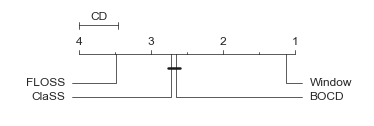

In [12]:
cd = Orange.evaluation.scoring.compute_CD(means, df_runtimes.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_runtimes.columns[1:], cd=cd, width=5, reverse=True, textspace=1, ) # filename="../tmp/comparative-analysis.pdf"

Let's compute wins/losses against ClaSP.

In [13]:
selection = "ClaSS"

for rival in df_runtimes.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_runtimes[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs FLOSS: (wins/ties/losses): 62/0/13
ClaSS vs BOCD: (wins/ties/losses): 34/0/41
ClaSS vs Window: (wins/ties/losses): 0/0/75


([<matplotlib.axis.XTick at 0x7fc57f2f2d60>,
 [Text(0, 0, 'Chinatown'),
  Text(1, 0, 'TwoLeadECG'),
  Text(2, 0, 'ECGFiveDays'),
  Text(3, 0, 'CBF'),
  Text(4, 0, 'Coffee'),
  Text(5, 0, 'Lightning2'),
  Text(6, 0, 'InsectWingbeat'),
  Text(7, 0, 'DiatomSize'),
  Text(8, 0, 'SonySurface1'),
  Text(9, 0, 'Adiac'),
  Text(10, 0, 'Beef'),
  Text(11, 0, 'DistalPhalanx'),
  Text(12, 0, 'ArrowHead'),
  Text(13, 0, 'ItalyPowerDemand'),
  Text(14, 0, 'MoteStrain'),
  Text(15, 0, 'SonySurface2'),
  Text(16, 0, 'UMD'),
  Text(17, 0, 'GunPoint'),
  Text(18, 0, 'Symbols'),
  Text(19, 0, 'OSULeaf'),
  Text(20, 0, 'Car'),
  Text(21, 0, 'WordSynonyms'),
  Text(22, 0, 'ECG200'),
  Text(23, 0, 'MedicalImages'),
  Text(24, 0, 'ShapeletSim'),
  Text(25, 0, 'BeetleFly'),
  Text(26, 0, 'BirdChicken'),
  Text(27, 0, 'DistalPhalanxTW'),
  Text(28, 0, 'CricketZ'),
  Text(29, 0, 'ToeSegmentation1'),
  Text(30, 0, 'UWaveGestureLibraryZ'),
  Text(31, 0, 'UWaveGestureLibraryY'),
  Text(32, 0, 'UWaveGestureLibrary

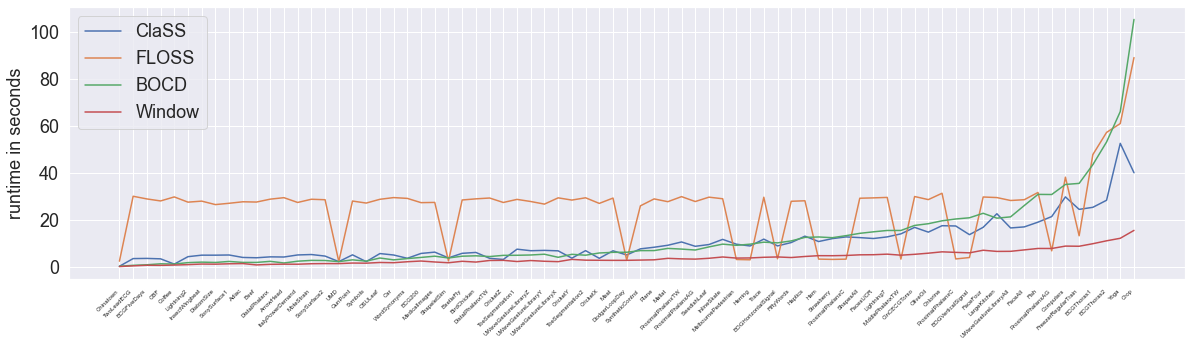

In [14]:
fontsize = 18
_, ax  = plt.subplots(1, figsize=(20,5))

df_runtimes

for name in df_runtimes.columns[1:]:
    ax.plot(df_runtimes[name].to_numpy()[idx_sizes], label=name)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.legend(loc=2, prop={'size': fontsize})
ax.set_ylabel("runtime in seconds", fontsize=fontsize)
# ax.set_yscale('log')

names = df_runtimes.name.to_numpy().tolist()

for idx, name in enumerate(names):
    if name == "PigInternalBleedingDatasetAirwayPressure":
        names[idx] = "PigAirwayPressure"
        
    if name == "PigInternalBleedingDatasetArtPressureFluidFilled":
        names[idx] = "PigFluidFilled"
        
    if name == "PigInternalBleedingDatasetCVP":
        names[idx] = "PigCVP"
        
    if name == "ChlorineConcentration":
        names[idx] = "Chlorine"
        
    if name == "DiatomSizeReduction":
        names[idx] = "DiatomSize"
        
    if name == "DistalPhalanxOutlineAgeGroup":
        names[idx] = "DistalPhalanx"
        
    if name == "InsectWingbeatSound":
        names[idx] = "InsectWingbeat"
        
    if name == "LargeKitchenAppliances":
        names[idx] = "LargeKitchen"
        
    if name == "NonInvasiveFetalECGThorax1":
        names[idx] = "ECGThorax1"
        
    if name == "NonInvasiveFetalECGThorax2":
        names[idx] = "ECGThorax2"
        
    if name == "ProximalPhalanxOutlineAgeGroup":
        names[idx] = "ProximalPhalanxAG"
        
    if name == "ProximalPhalanxOutlineCorrect":
        names[idx] = "ProximalPhalanxC"
        
    if name == "MiddlePhalanxOutlineAgeGroup":
        names[idx] = "ProximalPhalanxAG"
        
    if name == "MiddlePhalanxOutlineCorrect":
        names[idx] = "ProximalPhalanxC"
        
    if name == "SonyAIBORobotSurface1":
        names[idx] = "SonySurface1"
        
    if name == "SonyAIBORobotSurface2":
        names[idx] = "SonySurface2"
        
names = np.array(names)[idx_sizes]

plt.xticks(range(df_runtimes.shape[0]), names, rotation = 45, ha="right", fontsize=6)
# plt.show()
# plt.savefig(f"../tmp/runtime.pdf", bbox_inches="tight")

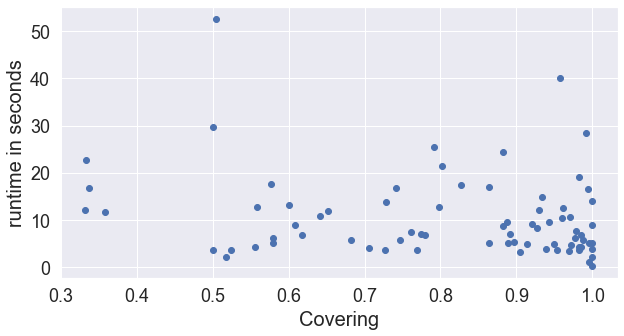

In [15]:
fontsize = 18

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_scores.ClaSS, df_runtimes.ClaSS)
ax.set_xlabel("Covering", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

# ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

# plt.show()
# plt.savefig(f"../tmp/runtime_covering.pdf", bbox_inches="tight")

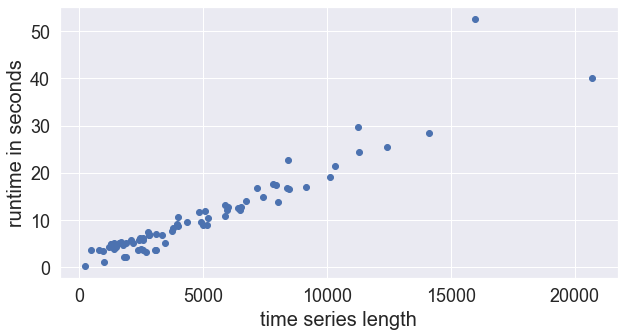

In [16]:
fontsize = 18

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_comb.time_series.apply(len), df_runtimes.ClaSS)

# ax.set_yscale('log')

ax.set_xlabel("time series length", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

# plt.show()
# plt.savefig(f"../tmp/runtime_length.pdf", bbox_inches="tight")

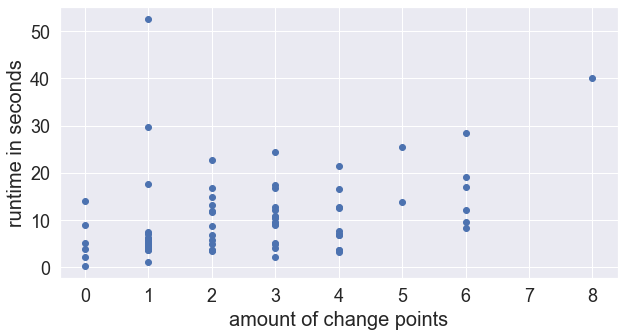

In [17]:
fontsize = 18

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_comb["change_points"].apply(len), df_runtimes.ClaSS)
ax.set_xlabel("amount of change points", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

# ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

# plt.show()
# plt.savefig(f"../tmp/runtime_cps.pdf", bbox_inches="tight")

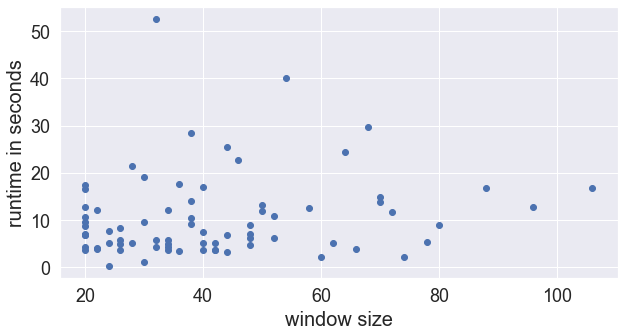

In [18]:
fontsize = 18

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_comb.window_size, df_runtimes.ClaSS)
ax.set_xlabel("window size", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

# ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

# plt.show()
# plt.savefig(f"../tmp/runtime_window.pdf", bbox_inches="tight")

[Text(1, 0, 'ClaSS'),
 Text(2, 0, 'FLOSS'),
 Text(3, 0, 'BOCD'),
 Text(4, 0, 'Window')]

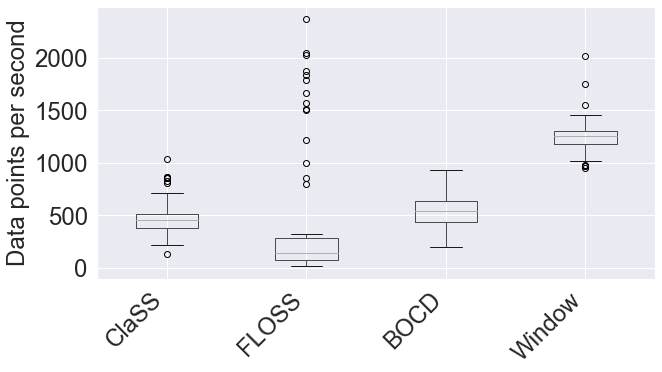

In [19]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_throughput.boxplot(ax=ax, rot=90)
ax.set_ylabel("Data points per second", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
#ax.set_yticks(np.round(np.arange(0, 1.0+.2,.2),1))
    
# plt.savefig(f"../../figures/bp_scalability_{dataset}.pdf", bbox_inches="tight") 